# Lead Scoring Case Study

## Following are the steps

#### 1.  Loading libraries and Dataframe
#### 2.  Checking Dataframe values
#### 3.  Cleaning the Data
#### 4.  Univariate Analysis (Categorical Variables)
#### 5.  Univariate Analysis (Numeric Variables)
#### 6.  Multivariate Analysis
#### 7.  Dummy Variables
#### 8.  Train-Test Split
#### 9. Feature Selection & Model building
#### 10. Evaluating Model
#### 11. Predict on Test



## 1. Loading Libraries and Dataframe

In [1]:
# importing the respective libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the data in Dataframe
inp_data = pd.read_csv(r'E:\Projects\Degree\5. Machine learning\11. lead scoring case study\Lead Scoring Assignment\Leads.csv')


## 2. Checking Dataframe Values

In [2]:
# checking the null values from the dataframe
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [3]:
# checking number of rows and columns
inp_data.shape

(9240, 37)

In [4]:
# checking the numeric values 
inp_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# displaying the data
inp_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 3. Cleaning The Data

In [6]:
# checking for the pecentage of missing values in dataframe

missing_values_percentage = round(100*(inp_data.isnull().sum()/len(inp_data.index)), 2)
print(missing_values_percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Insight

 * Columns such as  'Last Activity', 'Last notable Activity' and 'lead quality' no part in analysis.
 * Prospect ID and Lead Number both are both unique identifiers and can be dropped as no role in analysis.
 * The Column 'Tags' is used for reference, as per business it has no relevance to the outcome, hence droping this as well.


In [7]:
# dropping the respective columns
inp_data.drop(['Prospect ID', 'Lead Number', 'Tags', 'Last Activity', 'Lead Quality','Last Notable Activity'], axis = 1, inplace = True)


In [8]:
inp_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,...,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,...,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,...,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,...,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Select,...,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No


Checking the values of non cloumns containing more than 45% null values

* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score

In [9]:
inp_data['Asymmetrique Activity Index'].value_counts(normalize = True, dropna = False)*100

NaN          45.649351
02.Medium    41.547619
01.High       8.885281
03.Low        3.917749
Name: Asymmetrique Activity Index, dtype: float64

In [10]:
inp_data['Asymmetrique Profile Index'].value_counts(normalize = True, dropna = False)*100

NaN          45.649351
02.Medium    30.173160
01.High      23.841991
03.Low        0.335498
Name: Asymmetrique Profile Index, dtype: float64

In [11]:
inp_data['Asymmetrique Activity Score'].value_counts(normalize = True, dropna = False)*100

NaN     45.649351
14.0    19.166667
15.0    13.993506
13.0     8.387446
16.0     5.054113
17.0     3.777056
12.0     2.121212
11.0     1.028139
10.0     0.616883
9.0      0.097403
18.0     0.054113
8.0      0.043290
7.0      0.010823
Name: Asymmetrique Activity Score, dtype: float64

In [12]:
inp_data['Asymmetrique Profile Score'].value_counts(normalize = True, dropna = False)*100

NaN     45.649351
15.0    19.036797
18.0    11.590909
16.0     6.482684
17.0     6.266234
20.0     3.333333
19.0     2.651515
14.0     2.445887
13.0     2.207792
12.0     0.238095
11.0     0.097403
Name: Asymmetrique Profile Score, dtype: float64

In [13]:
inp_data['How did you hear about X Education'].value_counts(normalize = True, dropna = False)*100

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [14]:
# replacing Select with NaN
inp_data['How did you hear about X Education'] = inp_data['How did you hear about X Education'].replace('Select', np.nan)


#### Above mentioned columns data is mostly null so we can drop respective columns

In [15]:
# dropping the respective columns
inp_data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index','How did you hear about X Education'], axis = 1, inplace = True)

In [16]:
# checking data and maximium displaying columns

pd.set_option('display.max_columns', None)
inp_data.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No


In [17]:
# checking the null values again
print(round(100*(inp_data.isnull().sum()/len(inp_data.index)), 2))

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [18]:
# checking the country values
inp_data['Country'].value_counts(normalize = True, dropna = False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [19]:
# checking city values
inp_data['City'].value_counts(normalize = True, dropna = False)*100

Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [20]:
# replacing Select with NaN
inp_data['City'] = inp_data['City'].replace('Select', np.nan)


In [21]:
# checking city values
inp_data['City'].value_counts(normalize = True, dropna = False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### We can take India as countries where City is Mumbai, Thane & Outskirts and  Other Cities of Maharashtra

In [22]:
inp_data['Country'] = np.where(inp_data['City']=='Mumbai', 'India', inp_data['Country'])
inp_data['Country'] = np.where(inp_data['City']=='Thane & Outskirts', 'India', inp_data['Country'])
inp_data['Country'] = np.where(inp_data['City']=='Other Cities of Maharashtra', 'India', inp_data['Country'])

In [23]:
# checking the country values
inp_data['Country'].value_counts(normalize = True, dropna = False)*100

India                   75.357143
NaN                     23.019481
United Arab Emirates     0.346320
United States            0.313853
Singapore                0.140693
Saudi Arabia             0.119048
unknown                  0.054113
United Kingdom           0.054113
Qatar                    0.054113
France                   0.043290
South Africa             0.043290
Oman                     0.043290
Nigeria                  0.043290
Australia                0.043290
Hong Kong                0.032468
Bahrain                  0.032468
Sweden                   0.021645
Ghana                    0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Kuwait                   0.021645
Italy                    0.021645
Sri Lanka                0.010823
Liberia                  0.010823
Philippines              0.010823
Denmark                  0.010823
Kenya                    0.010823
Russia                   0.010823
Tanzania      

#### Checking other missing values columns

In [24]:
# checking specialization column
inp_data['Specialization'].value_counts(normalize = True, dropna = False)*100

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [25]:
# replacing Select with NaN
inp_data['Specialization'] = inp_data['Specialization'].replace('Select', np.nan)

In [26]:

inp_data['Specialization'].value_counts(normalize = True, dropna = False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [27]:
# changing the name of some columns for ease

inp_data.rename(columns = {'Total Time Spent on Website': 'time_on_website',  
                     'What is your current occupation': 'profession',
                    'What matters most to you in choosing a course' : 'course_selection_reason', 
                    'Receive More Updates About Our Courses': 'courses_updates', 
                     'Update me on Supply Chain Content': 'supply_chain_content_updates',
                    'Get updates on DM Content': 'dm_content_updates',
                    'I agree to pay the amount through cheque': 'cheque_payment',
                    'A free copy of Mastering The Interview': 'mastering_interview'}, inplace = True)

In [28]:
inp_data['course_selection_reason'].value_counts(normalize = True, dropna = False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: course_selection_reason, dtype: float64

In [29]:
inp_data['profession'].value_counts(normalize = True, dropna = False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: profession, dtype: float64

#### We will impute the values for columns specialization, course selection reason and profession as data is distributed

In [30]:
# importing impute
import random

inp_data['Specialization'].fillna(random.choice(inp_data['Specialization'].notna()), inplace=True)
inp_data['course_selection_reason'].fillna(random.choice(inp_data['course_selection_reason'].notna()), inplace=True)
inp_data['profession'].fillna(random.choice(inp_data['profession'].notna()), inplace=True)

#### As the most of city and country are Mumbai and India so filling the missing values

In [31]:
inp_data['City'].fillna('Mumbai', inplace=True)
inp_data['Country'].fillna('India', inplace=True)

In [32]:
# checking the missing values again
round(100*(inp_data.isnull().sum())/len(inp_data.index),2)

Lead Origin                      0.00
Lead Source                      0.39
Do Not Email                     0.00
Do Not Call                      0.00
Converted                        0.00
TotalVisits                      1.48
time_on_website                  0.00
Page Views Per Visit             1.48
Country                          0.00
Specialization                   0.00
profession                       0.00
course_selection_reason          0.00
Search                           0.00
Magazine                         0.00
Newspaper Article                0.00
X Education Forums               0.00
Newspaper                        0.00
Digital Advertisement            0.00
Through Recommendations          0.00
courses_updates                  0.00
supply_chain_content_updates     0.00
dm_content_updates               0.00
Lead Profile                    29.32
City                             0.00
cheque_payment                   0.00
mastering_interview              0.00
dtype: float

In [33]:
# checking the lead profile

inp_data['Lead Profile'].value_counts(normalize = True, dropna = False)*100

Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

In [34]:
# replacing Select with NaN
inp_data['Lead Profile'] = inp_data['Lead Profile'].replace('Select', np.nan)

In [35]:
inp_data['Lead Profile'].value_counts(normalize = True, dropna = False)*100

NaN                            74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

#### The respective column is not of much significance. Therefore, we will drop respective column.

In [36]:
# dropping the respective column
inp_data.drop(['Lead Profile'], axis = 1, inplace = True)

In [37]:
# checking the missing values again
round(100*(inp_data.isnull().sum())/len(inp_data.index),2)

Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
time_on_website                 0.00
Page Views Per Visit            1.48
Country                         0.00
Specialization                  0.00
profession                      0.00
course_selection_reason         0.00
Search                          0.00
Magazine                        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
City                            0.00
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [38]:
# checking the page views per visit
inp_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [39]:
# filling the missing values with median values
inp_data['Page Views Per Visit'].fillna(inp_data['Page Views Per Visit'].median(), inplace=True)


In [40]:
# checking the total visits
inp_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [41]:
# similarly filling the missing values with median values
inp_data['TotalVisits'].fillna(inp_data['TotalVisits'].median(), inplace=True)

In [42]:
# checking the Lead source values
inp_data['Lead Source'].value_counts(normalize = True, dropna = False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [43]:
# we can see google two times with lower case and higher case

inp_data['Lead Source'] = inp_data['Lead Source'].replace('google', 'Google')
inp_data['Lead Source'].value_counts(normalize = True, dropna = False)*100

Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [44]:
# replacing the NaN values by median values such as Google
inp_data['Lead Source'].fillna(inp_data['Lead Source'].mode()[0], inplace=True)
inp_data['Lead Source'].value_counts(normalize = True, dropna = False)*100

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [45]:
# checking dataframe again
round(100*(inp_data.isnull().sum())/len(inp_data.index),2)

Lead Origin                     0.0
Lead Source                     0.0
Do Not Email                    0.0
Do Not Call                     0.0
Converted                       0.0
TotalVisits                     0.0
time_on_website                 0.0
Page Views Per Visit            0.0
Country                         0.0
Specialization                  0.0
profession                      0.0
course_selection_reason         0.0
Search                          0.0
Magazine                        0.0
Newspaper Article               0.0
X Education Forums              0.0
Newspaper                       0.0
Digital Advertisement           0.0
Through Recommendations         0.0
courses_updates                 0.0
supply_chain_content_updates    0.0
dm_content_updates              0.0
City                            0.0
cheque_payment                  0.0
mastering_interview             0.0
dtype: float64

### Data cleaning has been done here. We will start the analysis now.

## 4. Univariate Analysis (Categorical Variables)

In [46]:
# checking some columns values 
inp_data['Do Not Email'].value_counts(normalize = True, dropna = False)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [47]:
inp_data['Do Not Call'].value_counts(normalize = True, dropna = False)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [48]:
inp_data['Search'].value_counts(normalize = True, dropna = False)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [49]:
inp_data['Newspaper Article'].value_counts(normalize = True, dropna = False)*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [50]:
inp_data['X Education Forums'].value_counts(normalize = True, dropna = False)*100


No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [51]:
inp_data['Newspaper'].value_counts(normalize = True, dropna = False)*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [52]:
inp_data['Digital Advertisement'].value_counts(normalize = True, dropna = False)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [53]:
inp_data['mastering_interview'].value_counts(normalize = True, dropna = False)*100

No     68.744589
Yes    31.255411
Name: mastering_interview, dtype: float64

In [54]:
inp_data['Through Recommendations'].value_counts(normalize = True, dropna = False)*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

it is clear from above columns that following mentioned columns have almost one values and no value in term of analysis

* Do not call
* Search
* Newspaper Article
* X education forum
* Newspaper
* Through recommnedation

We are not dropping other columns as they still contains some data that is useful.

In [55]:
# dropping respective mentioned columns
inp_data.drop(['Through Recommendations', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Search','Do Not Call'], axis = 1, inplace = True)



#### checking more columns for values

In [56]:
# checking some columns values 
inp_data['Magazine'].value_counts(normalize = True, dropna = False)*100

No    100.0
Name: Magazine, dtype: float64

In [57]:
inp_data['courses_updates'].value_counts(normalize = True, dropna = False)*100

No    100.0
Name: courses_updates, dtype: float64

In [58]:
inp_data['supply_chain_content_updates'].value_counts(normalize = True, dropna = False)*100

No    100.0
Name: supply_chain_content_updates, dtype: float64

In [59]:
inp_data['dm_content_updates'].value_counts(normalize = True, dropna = False)*100

No    100.0
Name: dm_content_updates, dtype: float64

In [60]:
inp_data['cheque_payment'].value_counts(normalize = True, dropna = False)*100

No    100.0
Name: cheque_payment, dtype: float64

#### All the above columns just contain one value and there is not other data there. So there is value in analysis. So we will drop them.

In [61]:
# dropping respective mentioned columns
inp_data.drop(['Magazine', 'courses_updates', 'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment'], axis = 1, inplace = True)



In [62]:
# checking the dataframe
inp_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,profession,course_selection_reason,Digital Advertisement,City,mastering_interview
0,API,Olark Chat,No,0,0.0,0,0.0,India,False,Unemployed,Better Career Prospects,No,Mumbai,No
1,API,Organic Search,No,0,5.0,674,2.5,India,False,Unemployed,Better Career Prospects,No,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,False,Unemployed,Better Career Prospects,No,Mumbai,No


## 5. Univariate Analysis (Numeric Variables)

Text(0.5, 1.0, 'Course Selection Reasons')

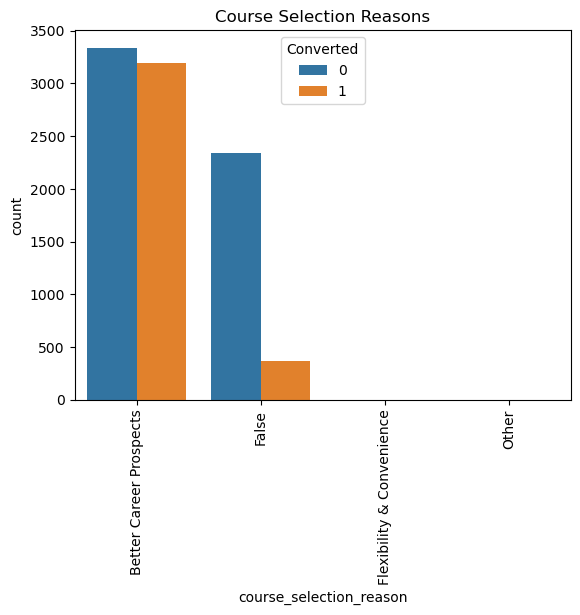

In [63]:
# plotting the course selection reason

cs=sns.countplot(inp_data['course_selection_reason'], hue=inp_data['Converted'])
cs.set_xticklabels(cs.get_xticklabels(),rotation=90)
plt.title('Course Selection Reasons')

Text(0.5, 1.0, 'Profession')

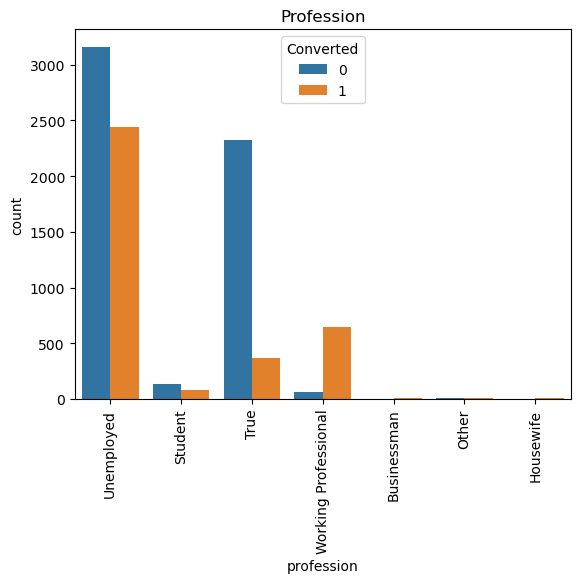

In [64]:
# plotting the profession 

pf=sns.countplot(inp_data['profession'], hue=inp_data['Converted'])
pf.set_xticklabels(pf.get_xticklabels(),rotation=90)
plt.title('Profession')

Text(0.5, 1.0, 'Specialization')

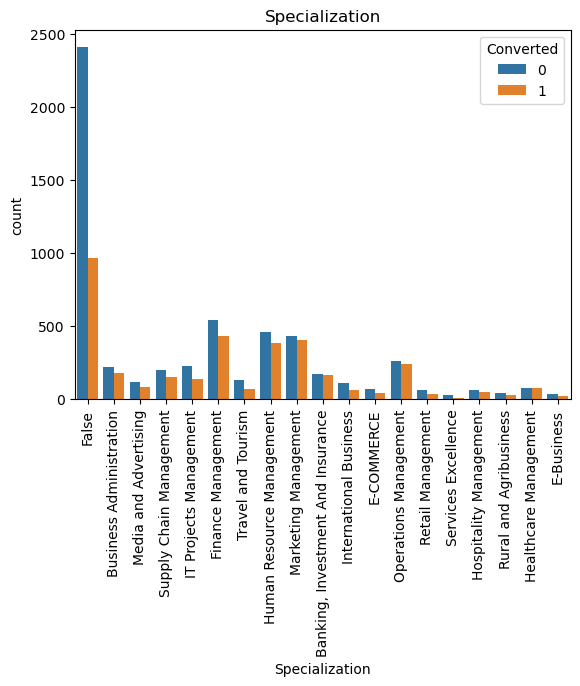

In [65]:
# plotting the specialization
sp=sns.countplot(inp_data['Specialization'], hue=inp_data['Converted'])
sp.set_xticklabels(sp.get_xticklabels(),rotation=90)
plt.title('Specialization')

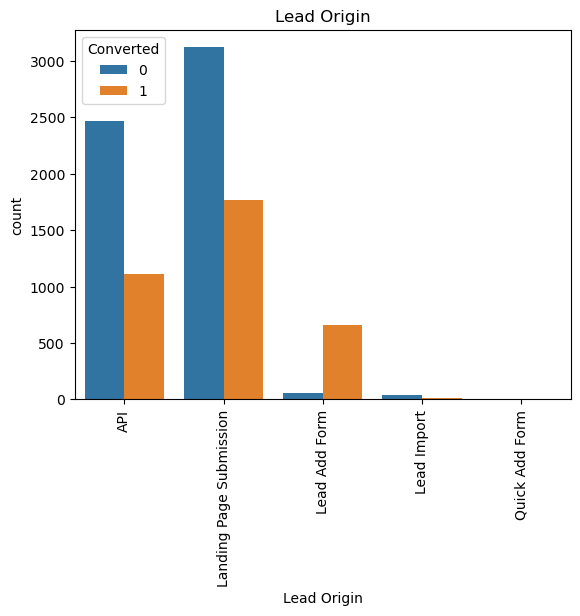

In [66]:
#plotting Lead origin and converted

lo=sns.countplot(inp_data['Lead Origin'], hue=inp_data['Converted'])
lo.set_xticklabels(lo.get_xticklabels(),rotation=90)
plt.title('Lead Origin')
plt.show()

Text(0.5, 1.0, 'Lead Source')

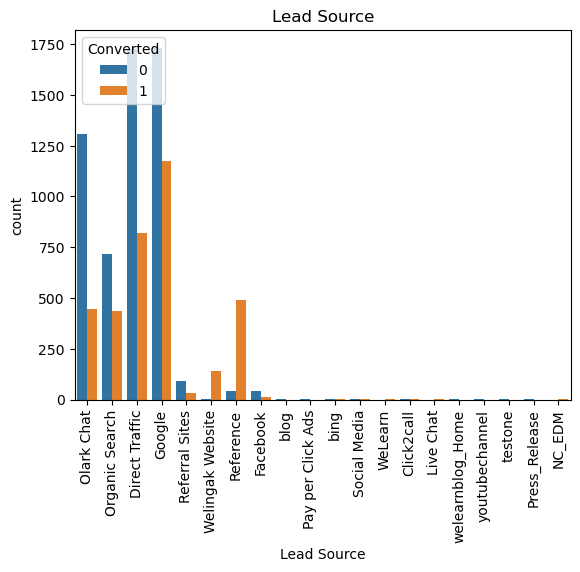

In [67]:
# checking the lead source
ls=sns.countplot(inp_data['Lead Source'], hue=inp_data['Converted'])
ls.set_xticklabels(ls.get_xticklabels(),rotation=90)
plt.title('Lead Source')

Text(0.5, 1.0, 'Country')

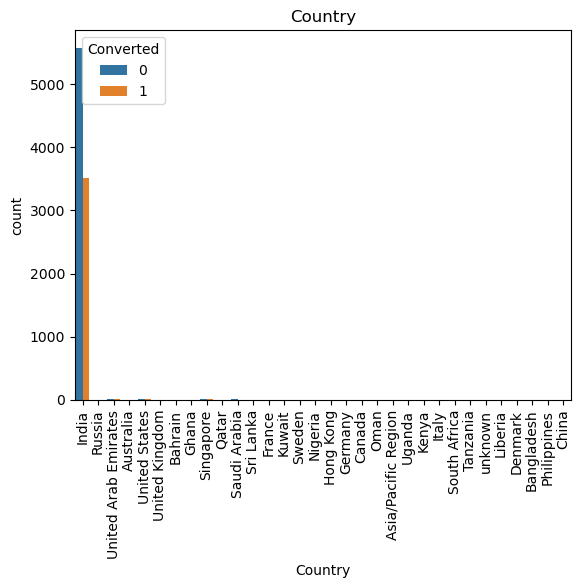

In [68]:
# plotting the country distribution

cy=sns.countplot(inp_data['Country'], hue=inp_data['Converted'])
cy.set_xticklabels(cy.get_xticklabels(),rotation=90)
plt.title('Country')

Text(0.5, 1.0, 'City')

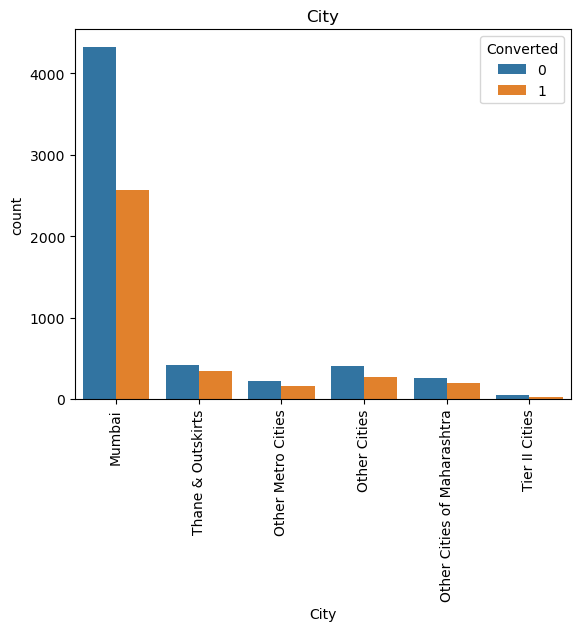

In [69]:
# plotting the cities

ci=sns.countplot(inp_data['City'], hue=inp_data['Converted'])
ci.set_xticklabels(ci.get_xticklabels(),rotation=90)
plt.title('City')

### Insights from Above Charts
* Courses are predominately selected for better career prospects.
* Unemployed people are the highest category of professional that are potential customers.
* Mostly people are interested in International business management specialization courses.
* Landing page submission are highest for potential customer.
* Mostly customers are coming to website from Google search.
* Most traffic is predominately coming from India specially from Mumbai city.

## 6. Multivariate Analysis

In [70]:
inp_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,profession,course_selection_reason,Digital Advertisement,City,mastering_interview
0,API,Olark Chat,No,0,0.0,0,0.0,India,False,Unemployed,Better Career Prospects,No,Mumbai,No
1,API,Organic Search,No,0,5.0,674,2.5,India,False,Unemployed,Better Career Prospects,No,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,False,Unemployed,Better Career Prospects,No,Mumbai,No


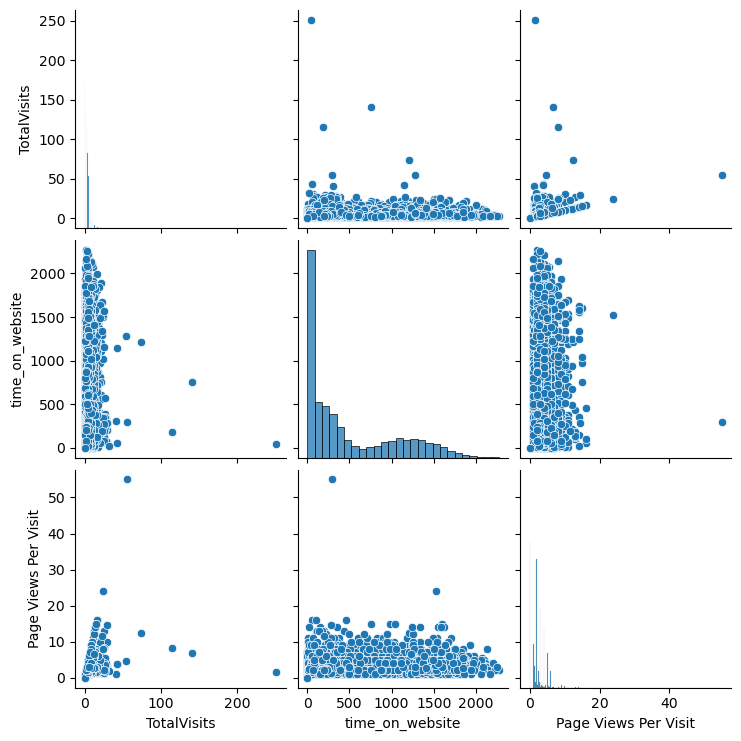

In [71]:
sns.pairplot(inp_data, vars=['TotalVisits','time_on_website','Page Views Per Visit'])
plt.show()


### Observations:
* It is clear that there are high values in the data specially time on web
* We need to handle the outliers


<AxesSubplot:>

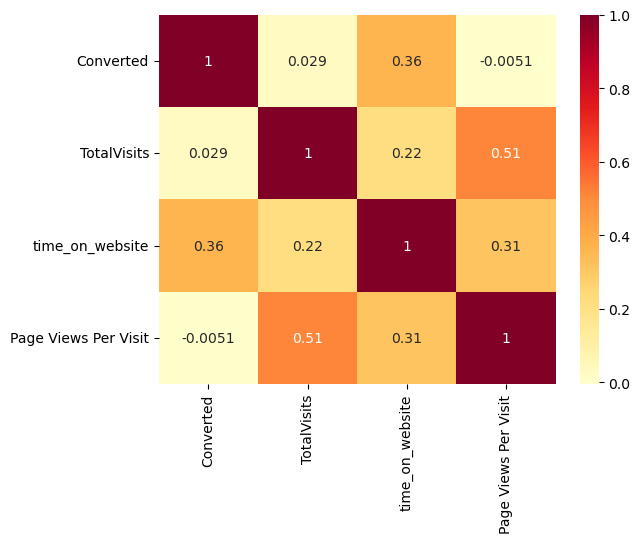

In [72]:
# making the correlation matrix

sns.heatmap(inp_data.corr(), cmap="YlOrRd", annot = True)

#### Findings
* Page views per visit has negative correlation with coverted
* Time spend on website has strong and postive correlation with converted.

<AxesSubplot:xlabel='TotalVisits'>

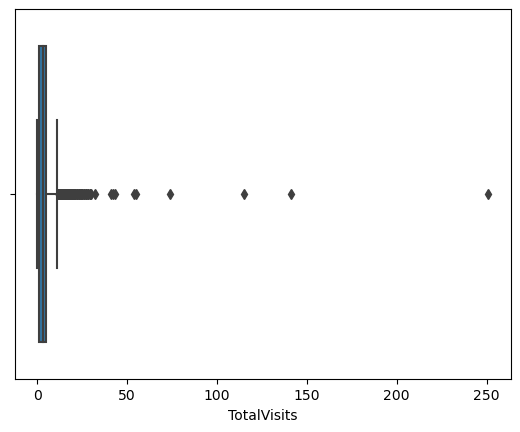

In [73]:
# building the boxplots to check the values
# building the total visit box plot

sns.boxplot(inp_data.TotalVisits)

<AxesSubplot:xlabel='time_on_website'>

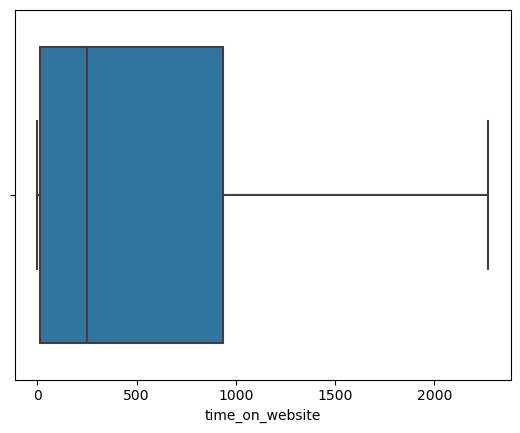

In [74]:
# building the total visit box plot

sns.boxplot(inp_data.time_on_website)

<AxesSubplot:xlabel='Page Views Per Visit'>

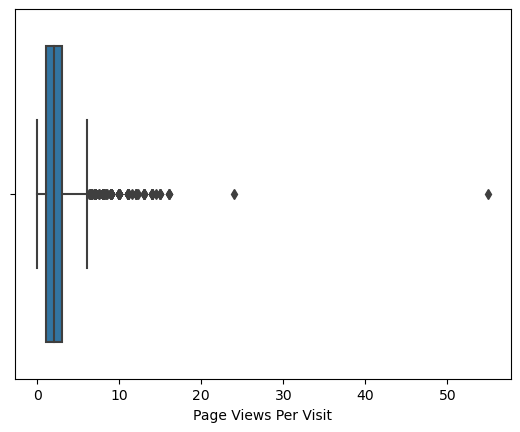

In [75]:
# checking page views per visit box plot
sns.boxplot(inp_data['Page Views Per Visit'])

#### it is clear from above boxplots that
* Total visits and page views per visit got the outliers that can be treated by capping them to 99 percentile.
* Moreover, a user can view or vist a page many times and total visits are be more. So we will leave the outliers as it is.

## 7. Dummy Variables

In [76]:
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead Origin              9240 non-null   object 
 1   Lead Source              9240 non-null   object 
 2   Do Not Email             9240 non-null   object 
 3   Converted                9240 non-null   int64  
 4   TotalVisits              9240 non-null   float64
 5   time_on_website          9240 non-null   int64  
 6   Page Views Per Visit     9240 non-null   float64
 7   Country                  9240 non-null   object 
 8   Specialization           9240 non-null   object 
 9   profession               9240 non-null   object 
 10  course_selection_reason  9240 non-null   object 
 11  Digital Advertisement    9240 non-null   object 
 12  City                     9240 non-null   object 
 13  mastering_interview      9240 non-null   object 
dtypes: float64(2), int64(2),

In [77]:
inp_data.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,profession,course_selection_reason,Digital Advertisement,City,mastering_interview
0,API,Olark Chat,No,0,0.0,0,0.0,India,False,Unemployed,Better Career Prospects,No,Mumbai,No
1,API,Organic Search,No,0,5.0,674,2.5,India,False,Unemployed,Better Career Prospects,No,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,False,Unemployed,Better Career Prospects,No,Mumbai,No


In [78]:
# changing the values of "Yes" or "No" to 1 and 0 for catgorey columns

cat_cols = ['Do Not Email', 'mastering_interview','Digital Advertisement']
# Defining the function for the map
def change_value(x):
    return x.map({'Yes': 1, "No": 0})

inp_data[cat_cols] = inp_data[cat_cols].apply(change_value)
inp_data.head()



,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,profession,course_selection_reason,Digital Advertisement,City,mastering_interview
0,API,Olark Chat,0,0,0.0,0,0.0,India,False,Unemployed,Better Career Prospects,0,Mumbai,0
1,API,Organic Search,0,0,5.0,674,2.5,India,False,Unemployed,Better Career Prospects,0,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,False,Unemployed,Better Career Prospects,0,Mumbai,0


In [79]:
# creating the dummy variables for category columns

cat_cols_details = ['Lead Origin', 'Lead Source', 'Country', 'Specialization', 'profession', 'course_selection_reason','City']
dummy = pd.get_dummies(inp_data[cat_cols_details], drop_first = True)

# Adding the results to the lead_data dataframe
inp_data = pd.concat([inp_data, dummy], axis=1)

In [80]:
inp_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,profession,course_selection_reason,Digital Advertisement,City,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,profession_Businessman,profession_Housewife,profession_Other,profession_Student,profession_Unemployed,profession_Working Professional,course_selection_reason_Better Career Prospects,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,India,False,Unemployed,Better Career Prospects,0,Mumbai,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,India,False,Unemployed,Better Career Prospects,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,Mumbai,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,False,Unemployed,Better Career Prospects,0,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [81]:
# droping columns for which dummy's has been created
inp_data.drop(cat_cols_details, axis=1, inplace=True)

In [82]:
inp_data.columns

Index(['Do Not Email', 'Converted', 'TotalVisits', 'time_on_website',
       'Page Views Per Visit', 'Digital Advertisement', 'mastering_interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Country_Australia', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Canada', 'Country_China',
       'Country_Denmark', 'Country_France

## 8. Train Test Split

In [83]:
# testing and training data split
X=inp_data.drop('Converted', axis=1)
y=inp_data['Converted']
X.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Digital Advertisement,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,profession_Businessman,profession_Housewife,profession_Other,profession_Student,profession_Unemployed,profession_Working Professional,course_selection_reason_Better Career Prospects,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [84]:
# Split the dataset into 70% and 30% for train and test respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)
print("X Train Shape",X_train.shape)
print("X Test Shape",X_test.shape)
print("Y Train Shape",y_train.shape)
print("Y Test Shape",y_test.shape)

X Train Shape (6468, 92)
X Test Shape (2772, 92)
Y Train Shape (6468,)
Y Test Shape (2772,)


In [85]:
X_train.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Digital Advertisement,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,profession_Businessman,profession_Housewife,profession_Other,profession_Student,profession_Unemployed,profession_Working Professional,course_selection_reason_Better Career Prospects,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3112,0,2.0,412,2.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
8413,0,5.0,1531,5.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2961,0,3.0,1248,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
24,0,6.0,1137,1.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2740,0,3.0,1003,3.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


scaling the columns total visits, time on websites and page views per vist

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'time_on_website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'time_on_website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Digital Advertisement,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,profession_Businessman,profession_Housewife,profession_Other,profession_Student,profession_Unemployed,profession_Working Professional,course_selection_reason_Better Career Prospects,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3112,0,0.007968,0.182867,0.083333,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
8413,0,0.019920,0.679538,0.208333,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2961,0,0.011952,0.553928,0.041667,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
24,0,0.023904,0.504660,0.062500,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2740,0,0.011952,0.445184,0.125000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


## 9. Feature Selection & Model building

In [87]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Initialize model
lr = LogisticRegression()
# Lets select 1st 15 features to start with
rfe = RFE(lr, step=15)
rfe = rfe.fit(X_train, y_train)
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('time_on_website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Digital Advertisement', False, 5),
 ('mastering_interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_WeLearn', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 4),
 ('Lead S

In [88]:
# Put all the columns selected by RFE in the variable 'col'
columns2 = X_train.columns[rfe.support_]
columns2

Index(['Do Not Email', 'TotalVisits', 'time_on_website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Country_France',
       'Country_Germany', 'Country_Italy', 'Country_Nigeria', 'Country_Oman',
       'Country_Singapore', 'Country_South Africa', 'Country_Sweden',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_

checking the model with StatsModel

In [89]:
# 1st X_train with only columns provided by RFE
import statsmodels.api as sm
X_train_rfe = X_train[columns2]
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.3
Date:                Tue, 23 May 2023   Deviance:                       5694.6
Time:                        23:11:56   Pearson chi2:                 7.30e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -3.0154      0.124    -24.226      0.000      -3.259      -2.771
Do Not Email                                         -1.3008      0.159     -8.173      0.000      -1.613      -0.989
TotalVisits                                           5.4549      2.225      2.452      0.014       1.094       9.816
time_on_website                                       4.4719      0.160     27.965      0.000       4.158       4.785
Page Views Per Visit                                 -0.6754      0.541     -1.249      0.212      -1.736       0.385
Lead Origin_Landing Page Submission                  -0.6610      0.117     -5.674      0.000      -0.889      -0.433
Lead Origin_Lead Add Form                             3.3176      0.215     15.438      0.000       2.896       3.739
Lead Source_Facebook                                 -0.5020      0.484     -1.037      0.300      -1.451       0.447
Lead Source_NC_EDM                                   24.6221   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                0.8562      0.125      6.855      0.000       0.611       1.101
Lead Source_Referral Sites                           -0.4867      0.321     -1.517      0.129      -1.115       0.142
Lead Source_WeLearn                                  22.9317   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                          2.8798      1.026      2.805      0.005       0.868       4.892
Lead Source_bing                                    -21.6075   3.47e+04     -0.001      1.000   -6.81e+04     6.8e+04
Country_France                                        1.0282      1.251      0.822      0.411      -1.424       3.480
Country_Germany                                      22.9554   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Country_Italy                                       -23.8734   4.12e+04     -0.001      1.000   -8.07e+04    8.07e+04
Country_Nigeria                                     -22.5519   4.11e+04     -0.001      1.000   -8.06e+04    8.06e+04
Country_Oman                                          1.5826      1.436      1.102      0.270      -1.231       4.396
Country_Singapore                                     1.2483      0.824      1.514      0.130      -0.368       2.864
Country_South Africa                                  1.4846      1.442      1.030      0.303      -1.342       4.311
Country_Sweden                                      -22.9902   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Specialization_Banking, Investment And Insurance      0.7240      0.195      3.714      0.000       0.342       1.106
Specialization_

In [90]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28205798, 0.78648392, 0.99136842, 0.78635552, 0.61910306,
       0.29582829, 0.29582829, 0.31698904, 0.70999796, 0.10789497])

#### Creating the dataframe from prediction probabilities and converted flag

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.282058
1,1,0.786484
2,1,0.991368
3,1,0.786356
4,0,0.619103


In [92]:
# Creating with potential convertable customer if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_Prob,predicted
0,0,0.282058,0
1,1,0.786484,1
2,1,0.991368,1
3,1,0.786356,1
4,0,0.619103,1


In [93]:
# Let's check the overall accuracy.
from sklearn.metrics import confusion_matrix
from sklearn import tree, model_selection, metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100)

80.1638837353123


#### It is clear from above answer that model accuracy is around 80.16%

In [94]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
42,course_selection_reason_Better Career Prospects,260.29
40,profession_Unemployed,222.05
41,profession_Working Professional,29.90
39,profession_Student,8.34
4,Lead Origin_Landing Page Submission,6.10
3,Page Views Per Visit,3.81
2,time_on_website,2.11
25,Specialization_Finance Management,1.93
1,TotalVisits,1.92
27,Specialization_Human Resource Management,1.80


#### please note following features have very high VIF

* course_selection_reason_Better Career Prospects
* Lead Origin_Landing Page Submission

In [95]:
# so dropping the them and checking again
columns2 = columns2.drop('course_selection_reason_Better Career Prospects', 1)
columns2

Index(['Do Not Email', 'TotalVisits', 'time_on_website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Country_France',
       'Country_Germany', 'Country_Italy', 'Country_Nigeria', 'Country_Oman',
       'Country_Singapore', 'Country_South Africa', 'Country_Sweden',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_

In [96]:
# checking VIF Again

X_train_rfe_2 = X_train[columns2]
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,6.01
3,Page Views Per Visit,3.80
40,profession_Unemployed,2.81
2,time_on_website,2.11
1,TotalVisits,1.92
25,Specialization_Finance Management,1.91
5,Lead Origin_Lead Add Form,1.80
27,Specialization_Human Resource Management,1.79
30,Specialization_Marketing Management,1.75
41,profession_Working Professional,1.48


In [97]:
# now the Lead Origin_Landing Page Submission have high VIF, so repeating the process dropping it and checking again

columns2 = columns2.drop('Lead Origin_Landing Page Submission', 1)
X_train_rfe_3 = X_train[columns2]
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.62
39,profession_Unemployed,2.79
2,time_on_website,2.11
1,TotalVisits,1.92
4,Lead Origin_Lead Add Form,1.58
40,profession_Working Professional,1.48
24,Specialization_Finance Management,1.37
26,Specialization_Human Resource Management,1.35
29,Specialization_Marketing Management,1.34
10,Lead Source_Welingak Website,1.26


#### now the VIF seems to be under control
#### Let making the model using features

In [98]:
X_train_sm3 = sm.add_constant(X_train_rfe_3)
logm3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.3
Date:                Tue, 23 May 2023   Deviance:                       5738.7
Time:                        23:12:00   Pearson chi2:                 7.19e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3618
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -3.2095      0.122    -26.320      0.000      -3.449      -2.971
Do Not Email                                         -1.3711      0.158     -8.657      0.000      -1.682      -1.061
TotalVisits                                           5.5351      2.240      2.472      0.013       1.146       9.925
time_on_website                                       4.5229      0.160     28.346      0.000       4.210       4.836
Page Views Per Visit                                 -0.8336      0.539     -1.547      0.122      -1.890       0.223
Lead Origin_Lead Add Form                             3.6968      0.206     17.968      0.000       3.294       4.100
Lead Source_Facebook                                 -0.2031      0.483     -0.421      0.674      -1.149       0.743
Lead Source_NC_EDM                                   24.5162   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                1.1091      0.119      9.331      0.000       0.876       1.342
Lead Source_Referral Sites                           -0.3122      0.320     -0.975      0.329      -0.940       0.315
Lead Source_WeLearn                                  22.7873   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                          2.7185      1.026      2.649      0.008       0.707       4.730
Lead Source_bing                                    -21.4974   3.44e+04     -0.001      1.000   -6.75e+04    6.74e+04
Country_France                                        1.1512      1.201      0.958      0.338      -1.203       3.505
Country_Germany                                      22.8734   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Country_Italy                                       -23.9640   4.04e+04     -0.001      1.000   -7.92e+04    7.92e+04
Country_Nigeria                                     -22.6400   4.08e+04     -0.001      1.000      -8e+04    7.99e+04
Country_Oman                                          1.6701      1.420      1.176      0.239      -1.113       4.453
Country_Singapore                                     1.3466      0.822      1.638      0.102      -0.265       2.958
Country_South Africa                                  1.5378      1.464      1.051      0.293      -1.331       4.407
Country_Sweden                                      -22.4584   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Specialization_Banking, Investment And Insurance      0.3472      0.180      1.927      0.054      -0.006       0.700
Specialization_Business Administration                0.1654      0.172      0.961      0.337      -0.172       0.503
Specialization_

Dropping the all the columns whose P value is near to 1 or near

In [99]:

columns2=columns2.drop(['Lead Source_NC_EDM','Lead Source_WeLearn','Lead Source_bing','Country_Germany','Country_Italy','Country_Nigeria','Country_Sweden','profession_Housewife','Specialization_Services Excellence'])

In [100]:
X_train_rfe_4 = X_train[columns2]
X_train_sm4 = sm.add_constant(X_train_rfe_4)
logm4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.7
Date:                Tue, 23 May 2023   Deviance:                       5759.3
Time:                        23:12:01   Pearson chi2:                 7.24e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3597
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -3.1974      0.121    -26.365      0.000      -3.435      -2.960
Do Not Email                                         -1.3726      0.158     -8.666      0.000      -1.683      -1.062
TotalVisits                                           5.5926      2.245      2.492      0.013       1.193       9.992
time_on_website                                       4.5205      0.159     28.387      0.000       4.208       4.833
Page Views Per Visit                                 -0.8290      0.539     -1.539      0.124      -1.885       0.227
Lead Origin_Lead Add Form                             3.7252      0.205     18.134      0.000       3.323       4.128
Lead Source_Facebook                                 -0.1963      0.482     -0.407      0.684      -1.142       0.749
Lead Source_Olark Chat                                1.1088      0.119      9.349      0.000       0.876       1.341
Lead Source_Referral Sites                           -0.3087      0.320     -0.965      0.335      -0.936       0.318
Lead Source_Welingak Website                          2.6966      1.026      2.628      0.009       0.685       4.708
Country_France                                        1.1510      1.203      0.957      0.339      -1.206       3.508
Country_Oman                                          1.6738      1.415      1.183      0.237      -1.100       4.447
Country_Singapore                                     1.3509      0.822      1.644      0.100      -0.260       2.962
Country_South Africa                                  1.5323      1.462      1.048      0.295      -1.333       4.398
Specialization_Banking, Investment And Insurance      0.3489      0.180      1.940      0.052      -0.004       0.702
Specialization_Business Administration                0.1882      0.171      1.099      0.272      -0.147       0.524
Specialization_E-Business                             0.3078      0.432      0.712      0.476      -0.539       1.155
Specialization_E-COMMERCE                             0.2397      0.309      0.776      0.437      -0.365       0.845
Specialization_Finance Management                     0.2587      0.125      2.074      0.038       0.014       0.503
Specialization_Healthcare Management                  0.5902      0.267      2.207      0.027       0.066       1.114
Specialization_Human Resource Management              0.3110      0.126      2.474      0.013       0.065       0.557
Specialization_IT Projects Management                 0.2867      0.188      1.523      0.128      -0.082       0.656
Specialization_International Business                 0.1341      0.235      0.571      0.568      -0.327       0.595
Specialization_

In [101]:
columns2 = columns2.drop(['Country_France','Lead Source_Facebook','Country_Oman','Country_Singapore','Country_South Africa','Specialization_Healthcare Management','profession_Student'], 1)
X_train_rfe_5 = X_train[columns2]
X_train_sm5 = sm.add_constant(X_train_rfe_5)
logm5 = sm.GLM(y_train, X_train_sm5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.0
Date:                Tue, 23 May 2023   Deviance:                       5799.9
Time:                        23:12:01   Pearson chi2:                 7.35e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3557
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -3.0482      0.116    -26.201      0.000      -3.276      -2.820
Do Not Email                                         -1.3779      0.159     -8.690      0.000      -1.689      -1.067
TotalVisits                                           5.5630      2.237      2.487      0.013       1.179       9.947
time_on_website                                       4.5095      0.158     28.456      0.000       4.199       4.820
Page Views Per Visit                                 -0.7802      0.535     -1.458      0.145      -1.829       0.268
Lead Origin_Lead Add Form                             3.7816      0.205     18.441      0.000       3.380       4.184
Lead Source_Olark Chat                                1.0796      0.117      9.217      0.000       0.850       1.309
Lead Source_Referral Sites                           -0.3395      0.318     -1.068      0.285      -0.962       0.283
Lead Source_Welingak Website                          2.6186      1.026      2.552      0.011       0.607       4.630
Specialization_Banking, Investment And Insurance      0.3646      0.178      2.052      0.040       0.016       0.713
Specialization_Business Administration                0.1691      0.170      0.996      0.319      -0.164       0.502
Specialization_E-Business                             0.2443      0.431      0.566      0.571      -0.601       1.090
Specialization_E-COMMERCE                             0.1779      0.307      0.580      0.562      -0.424       0.780
Specialization_Finance Management                     0.2470      0.123      2.007      0.045       0.006       0.488
Specialization_Human Resource Management              0.2796      0.124      2.259      0.024       0.037       0.522
Specialization_IT Projects Management                 0.2552      0.187      1.363      0.173      -0.112       0.622
Specialization_International Business                 0.1228      0.233      0.526      0.599      -0.334       0.580
Specialization_Marketing Management                   0.3099      0.124      2.490      0.013       0.066       0.554
Specialization_Media and Advertising                  0.1482      0.219      0.677      0.499      -0.281       0.577
Specialization_Operations Management                  0.2886      0.158      1.826      0.068      -0.021       0.598
Specialization_Rural and Agribusiness                 0.2641      0.356      0.741      0.459      -0.435       0.963
Specialization_Supply Chain Management                0.2149      0.173      1.241      0.214      -0.124       0.554
Specialization_Travel and Tourism                     0.0802      0.232      0.346      0.730      -0.374       0.535
profession_Othe

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values, i) for i in range(X_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.56
23,profession_Unemployed,2.63
2,time_on_website,2.09
1,TotalVisits,1.91
4,Lead Origin_Lead Add Form,1.55
24,profession_Working Professional,1.43
12,Specialization_Finance Management,1.34
16,Specialization_Marketing Management,1.31
13,Specialization_Human Resource Management,1.31
7,Lead Source_Welingak Website,1.26


In [103]:
# checking accuracy after dropping columns
y_train_pred = res.predict(X_train_sm5)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3512  442]
 [ 870 1644]]


In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100)

79.71552257266544


In [106]:
# accuracy not dropped much. dropping some more columns

columns2 = columns2.drop(['Lead Source_Referral Sites','City_Other Metro Cities','City_Other Cities of Maharashtra'], 1)
X_train_rfe_6 = X_train[columns2]
X_train_sm6 = sm.add_constant(X_train_rfe_6)
logm5 = sm.GLM(y_train, X_train_sm6, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.7
Date:                Tue, 23 May 2023   Deviance:                       5805.5
Time:                        23:14:57   Pearson chi2:                 7.36e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3552
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -3.0489      0.116    -26.311      0.000      -3.276      -2.822
Do Not Email                                         -1.3746      0.158     -8.677      0.000      -1.685      -1.064
TotalVisits                                           5.3212      2.207      2.412      0.016       0.996       9.646
time_on_website                                       4.5097      0.158     28.483      0.000       4.199       4.820
Page Views Per Visit                                 -0.7512      0.533     -1.410      0.159      -1.795       0.293
Lead Origin_Lead Add Form                             3.7720      0.205     18.412      0.000       3.370       4.174
Lead Source_Olark Chat                                1.0792      0.117      9.245      0.000       0.850       1.308
Lead Source_Welingak Website                          2.6308      1.026      2.564      0.010       0.620       4.642
Specialization_Banking, Investment And Insurance      0.3875      0.177      2.187      0.029       0.040       0.735
Specialization_Business Administration                0.2080      0.169      1.233      0.218      -0.123       0.539
Specialization_E-Business                             0.2848      0.431      0.660      0.509      -0.561       1.130
Specialization_E-COMMERCE                             0.2113      0.307      0.689      0.491      -0.390       0.813
Specialization_Finance Management                     0.2687      0.123      2.193      0.028       0.029       0.509
Specialization_Human Resource Management              0.3071      0.123      2.496      0.013       0.066       0.548
Specialization_IT Projects Management                 0.3011      0.186      1.621      0.105      -0.063       0.665
Specialization_International Business                 0.1469      0.233      0.630      0.529      -0.310       0.604
Specialization_Marketing Management                   0.3369      0.124      2.720      0.007       0.094       0.580
Specialization_Media and Advertising                  0.1849      0.219      0.846      0.398      -0.244       0.613
Specialization_Operations Management                  0.3377      0.157      2.158      0.031       0.031       0.644
Specialization_Rural and Agribusiness                 0.3327      0.355      0.937      0.349      -0.364       1.029
Specialization_Supply Chain Management                0.2554      0.172      1.483      0.138      -0.082       0.593
Specialization_Travel and Tourism                     0.1278      0.230      0.555      0.579      -0.324       0.579
profession_Other                                      0.7452      0.839      0.888      0.375      -0.900       2.390
profession_Unem

In [107]:
#Lets check accuracy after dropping these many features
y_train_pred = res.predict(X_train_sm6)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3513  441]
 [ 871 1643]]


In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100)

79.71552257266544


## 10. Model Evaluation

In [110]:
y_train_pred = res.predict(X_train_sm6)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3513  441]
 [ 871 1643]]
0.7971552257266543


In [111]:
# Metrics beyond simply accuracy

# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [112]:
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

sensitivity= 65.35 %
specificity= 88.85 %


With the current cut off as 0.5 we have around 79.7% accuracy, sensitivity of around 65.35% and specificity of around 88.85%.

In [114]:
# ROC function( shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


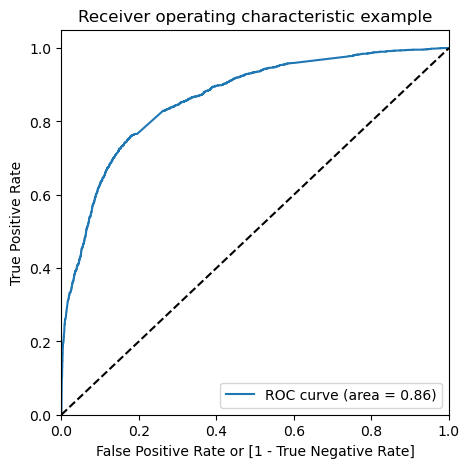

In [116]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [117]:
# area is under 0.86 that is good
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.294119,0,1,1,1,0,0,0,0,0,0,0
1,1,0.811484,1,1,1,1,1,1,1,1,1,1,0
2,1,0.972363,1,1,1,1,1,1,1,1,1,1,1
3,1,0.690357,1,1,1,1,1,1,1,1,0,0,0
4,0,0.584571,1,1,1,1,1,1,1,0,0,0,0


In [118]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.518553,0.984487,0.222307
0.2,0.2,0.699753,0.909706,0.566262
0.3,0.3,0.770099,0.831344,0.731158
0.4,0.4,0.801020,0.702864,0.863429
0.5,0.5,0.797155,0.653540,0.888467
0.6,0.6,0.784941,0.577963,0.916540
0.7,0.7,0.761750,0.482100,0.939555
0.8,0.8,0.736549,0.372713,0.967881
0.9,0.9,0.694960,0.226730,0.992666


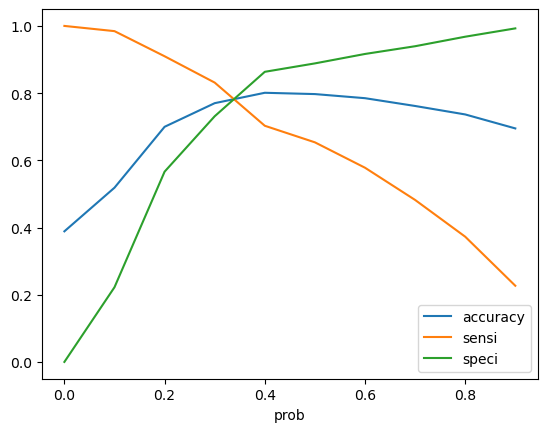

In [119]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.294119,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.811484,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.972363,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.690357,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.584571,1,1,1,1,1,1,1,0,0,0,0,1


In [121]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3513  441]
 [ 871 1643]]
0.7971552257266543


In [124]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

print("Accuracy=",round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

Accuracy= 79.72 %
sensitivity= 65.35 %
specificity= 88.85 %


## 11. Prediction on Test

In [123]:
# Scaling (only the transform not the fit) on test set
#X_trn, X_test, y_trn, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)
X_test[['TotalVisits', 'time_on_website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'time_on_website', 'Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Digital Advertisement,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,profession_Businessman,profession_Housewife,profession_Other,profession_Student,profession_Unemployed,profession_Working Professional,course_selection_reason_Better Career Prospects,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
567,0,0.015936,0.147359,0.166667,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2303,0,0.007968,0.688859,0.083333,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1523,0,0.011952,0.596538,0.125000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
6923,0,0.019920,0.083000,0.208333,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
7841,0,0.007968,0.311585,0.083333,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [126]:
# Selecting only those columns for test set, which are available in train set
X_test = X_test[columns2]
X_test.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,profession_Other,profession_Unemployed,profession_Working Professional,course_selection_reason_Flexibility & Convenience
567,0,0.015936,0.147359,0.166667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2303,0,0.007968,0.688859,0.083333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1523,0,0.011952,0.596538,0.125000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6923,0,0.019920,0.083000,0.208333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7841,0,0.007968,0.311585,0.083333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [127]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,profession_Other,profession_Unemployed,profession_Working Professional,course_selection_reason_Flexibility & Convenience
567,1.0,0,0.015936,0.147359,0.166667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2303,1.0,0,0.007968,0.688859,0.083333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1523,1.0,0,0.011952,0.596538,0.125000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6923,1.0,0,0.019920,0.083000,0.208333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7841,1.0,0,0.007968,0.311585,0.083333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,1.0,0,0.007968,0.118065,0.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1049,1.0,0,0.031873,0.703506,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7778,1.0,0,0.007968,0.135375,0.083333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6432,1.0,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [128]:
# Prdicting

y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.275690
1,0,0.822301
2,0,0.683237
3,0,0.214384
4,0,0.457757


In [129]:
# Making prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted,Converted_Prob,final_predicted
0,0,0.275690,0
1,0,0.822301,1
2,0,0.683237,1
3,0,0.214384,0
4,0,0.457757,1
...,...,...,...
2767,0,0.075481,0
2768,0,0.790142,1
2769,0,0.276073,0
2770,0,0.307468,1


In [130]:
print(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

0.7734487734487735


array([[1271,  454],
       [ 174,  873]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

print("Accuracy=",round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

Accuracy= 77.34 %
sensitivity= 83.38 %
specificity= 73.68 %


In [132]:
# Precision-Recall calculation for Train dataset

# Precision = TP / TP + FP
print("Precision(Train)=", round(confusion[1,1]/(confusion[0,1]+confusion[1,1])*100,2), "%")
#Recall = TP / TP + FN
print("Recall(Train)=", round(confusion[1,1]/(confusion[1,0]+confusion[1,1])*100,2),"%")

Precision(Train)= 78.84 %
Recall(Train)= 65.35 %


In [133]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

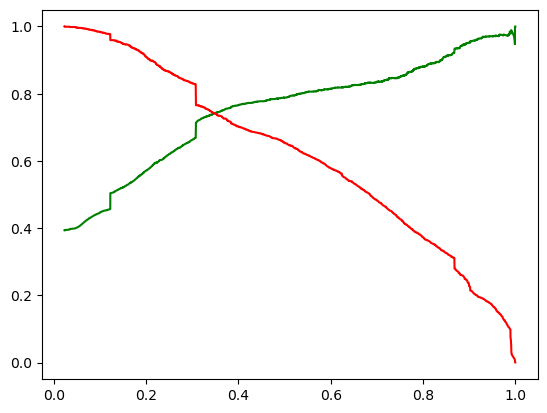

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The Precision-Recall curve shows that the cut off is at 0.35

In [135]:
# lets predict with ths cut off value
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

print("Accuracy=",round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

[[3513  441]
 [ 871 1643]]
0.7971552257266543
Accuracy= 79.72 %
sensitivity= 65.35 %
specificity= 88.85 %


With the current cut off as 0.35 
we have around 79.72% accuracy, sensitivity of around 65.35% and specificity of around 88.85%

In [137]:
# Prediction on test data with this new cutoff value of 0.35
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]
print("Accuracy=",round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

Accuracy= 79.83 %
sensitivity= 74.69 %
specificity= 82.96 %


 With the current cut off as 0.35 we have accuracy=79.22%, sensitivity=74.88% and specificity of around 81.68% for test dataset